## Latar Belakang

Gagal jantung (HF) terjadi ketika jantung tidak dapat memompa cukup darah untuk memenuhi kebutuhan tubuh.Biasanya disebabkan oleh diabetes, tekanan darah tingga atau kondisi penyakit jantung lainnya. Kelangsungan hidup pasien gagal jantung masih menjadi masalah saat ini, baik dalam hal mencapai akurasi prediksi yang tinggi maupun mengidentifikasi penyebab penyakit tersebut.



## Tujuan Penelitian
- Untuk memprediksi kelangsungan hidup dari setiap pasien yang mengalami gejala gagal jantung
-	Untuk mendeteksi gambaran klinis (atau risiko) yang paling penting faktor) yang dapat menyebabkan gagal jantung.

## Rumusan Masalah
-	Bagaimana hubungan kelangsungan hidup pasien gagal jantung dari rekam medis?

## Data Yang Dipakai

Dataset ini berisi rekam medis 299 pasien gagal jantung, yang dikumpulkan selama masa tindak lanjut, dimana setiap profil pasien memiliki 13 gambaran klinis.

https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records


## Metode



In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Get Data

In [93]:
df= pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

yang diberi kode 1 jika pasien meninggal atau 0 jika pasien bertahan selama masa tindak lanjut.

### Explore Data (EDA)

In [94]:
# Menunjukan jumlah baris dan kolom pada DataFrame
df.shape

(299, 13)

In [95]:
# Menampilkan baris teratas daris DataFrame
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [96]:
# Menampilkan 5 baris paling bawah pada DataFrame
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [97]:
# Menghasilkan ringkasan descriptif kolom numerik
df.describe().applymap(lambda x: f"{x:,.2f}")

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,38.08,0.35,"263,358.03",1.39,136.63,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,11.83,0.48,"97,804.24",1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,"25,100.00",0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,"212,500.00",0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,"262,000.00",1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,"303,500.00",1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,"7,861.00",1.00,80.00,1.00,"850,000.00",9.40,148.00,1.00,1.00,285.00,1.00


- applymap : menerapkan fungsi yang diberikan ke setiap elemen dalam dataframe
- lambda x : menerima satu argumen x yang mewakili nilai individual dalam dataframe.
- f"{x:,.2f}" :  string formating untuk menampilkan x dengan dua digit desimal.

menghasilkan ringkasan statistik deskriptif untuk setiap kolom numerik dalam dataframe, dengan nilai numerik diformat dengan dua digit desimal

In [98]:
# Menunjukan jumlah baris dan kolom pada DataFrame
df.shape

(299, 13)

Jadi pada yang ada di DataFrame terdapat 299 baris dan 13 kolom

In [99]:
# Menampilkan kolom yang ada di DataFrame
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [100]:
# Mengecek stuktur dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


df.info() berfungsi untuk memahami struktur dataframe, termasuk jumlah baris dan kolom, nama kolom, tipe data, dan statistik ringkasan.

In [101]:
# Menghitung matriks korelasi antar kolom dalam DataFrame
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


df.corr() digunakan untuk menghitung koefisien korelasi Pearson antara setiap pasangan kolom dalam dataframe. Koefisien korelasi menunjukkan hubungan linear antara dua variabel.

Nilai koefisien korelasi berkisar antara -1 dan 1.
- Nilai 0 menunjukkan tidak ada hubungan linear antara dua variabel.
- Nilai positif menunjukkan hubungan linear positif, di mana nilai satu variabel meningkat seiring dengan peningkatan nilai variabel lainnya.
- Nilai negatif menunjukkan hubungan linear negatif, di mana nilai satu variabel menurun seiring dengan peningkatan nilai variabel lainnya.

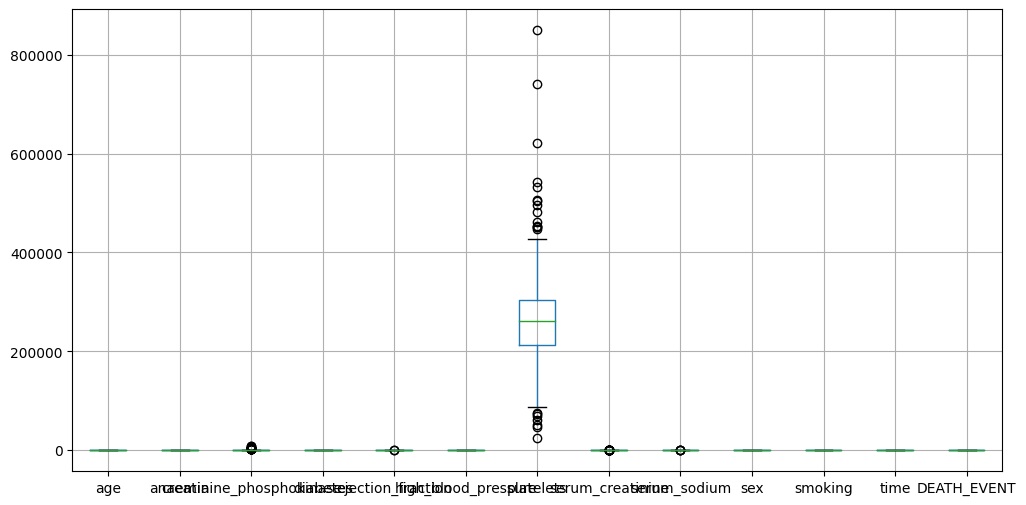

In [109]:
# Memvisualisasi distribusi data dengan boxplot
df.boxplot(figsize=(12,6))
plt.show()

Sumbu X : nilai usia dari 0-100 tahun
Sumbu Y : frekuensi (jumlah data) untuk setiap nilai usia

- Distribusi data skewed (miring) ke kanan.
- Mayoritas data berada di kisaran usia 0-40 tahun.
- Mayoritas data berasal dari kelompok usia muda.
- Ada beberapa outlier (titik data yang jauh dari distribusi utama) di atas usia 80 tahun.


In [110]:
# Membagi data berdasarkan status gagal jantung
df_hf = df[df['DEATH_EVENT'] == 1]
df_nohf = df[df['DEATH_EVENT'] == 0]

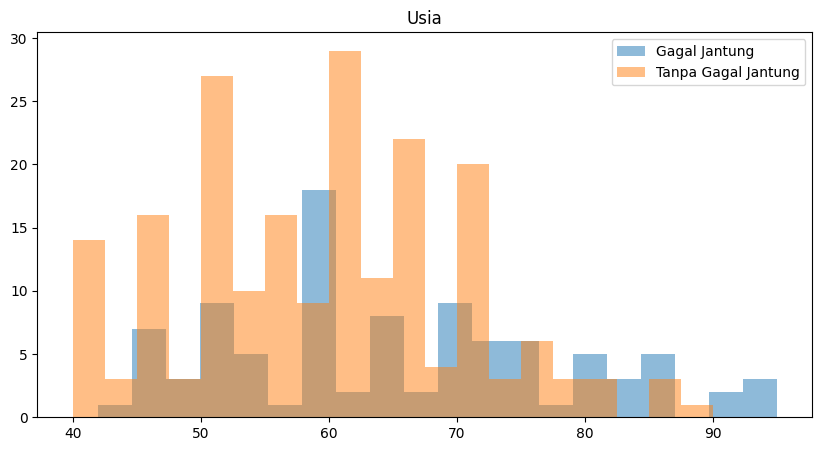

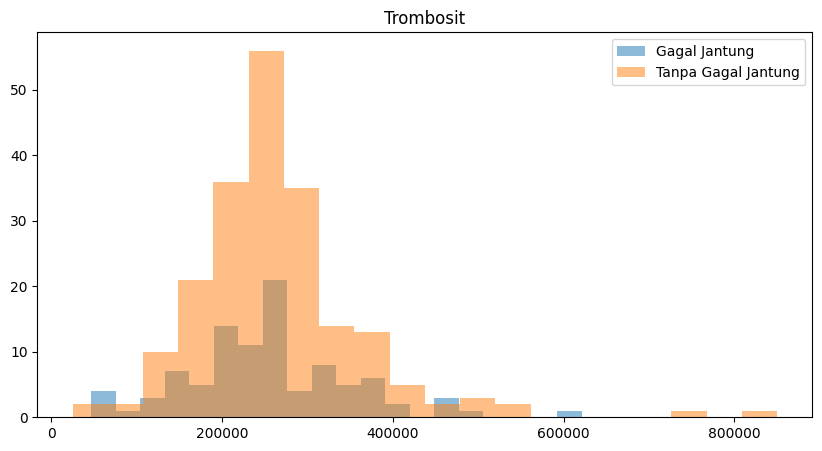

In [111]:
# Membandingkan distribusi
plt.figure(figsize=(10, 5))
plt.hist(df_hf['age'], bins=20, alpha=0.5, label='Gagal Jantung')
plt.hist(df_nohf['age'], bins=20, alpha=0.5, label='Tanpa Gagal Jantung')
plt.legend()
plt.title('Usia')


# Membandingkan distribusi platelets
plt.figure(figsize=(10, 5))
plt.hist(df_hf['platelets'], bins=20, alpha=0.5, label='Gagal Jantung')
plt.hist(df_nohf['platelets'], bins=20, alpha=0.5, label='Tanpa Gagal Jantung')
plt.legend()
plt.title('Trombosit')
plt.show()

- Pasien gagal jantung mungkin memiliki usia rata-rata lebih tinggi dibandingkan pasien tanpa gagal jantung.
- Tidak ada perbedaan signifikan dalam rata-rata trombosit antara pasien gagal jantung dan tanpa gagal jantung.

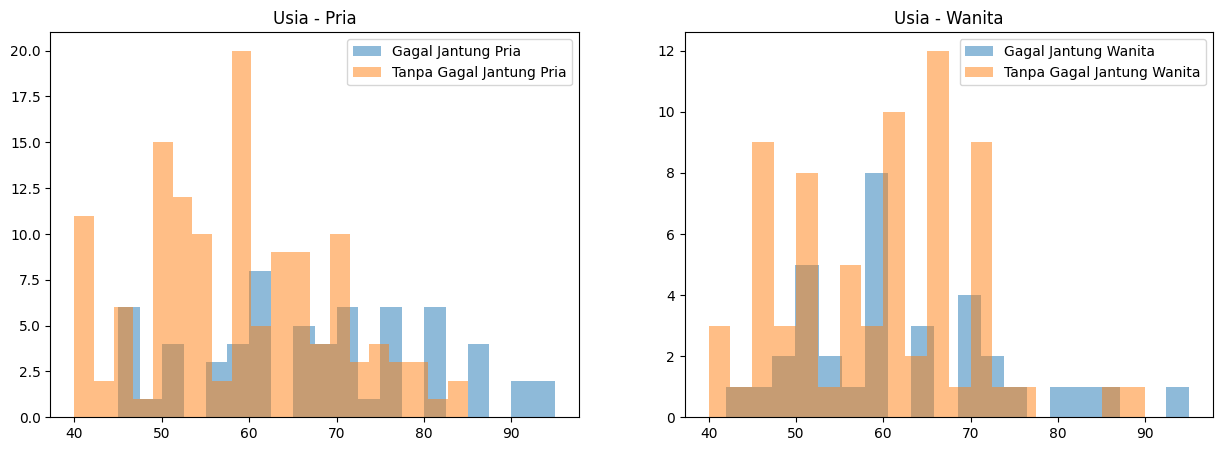

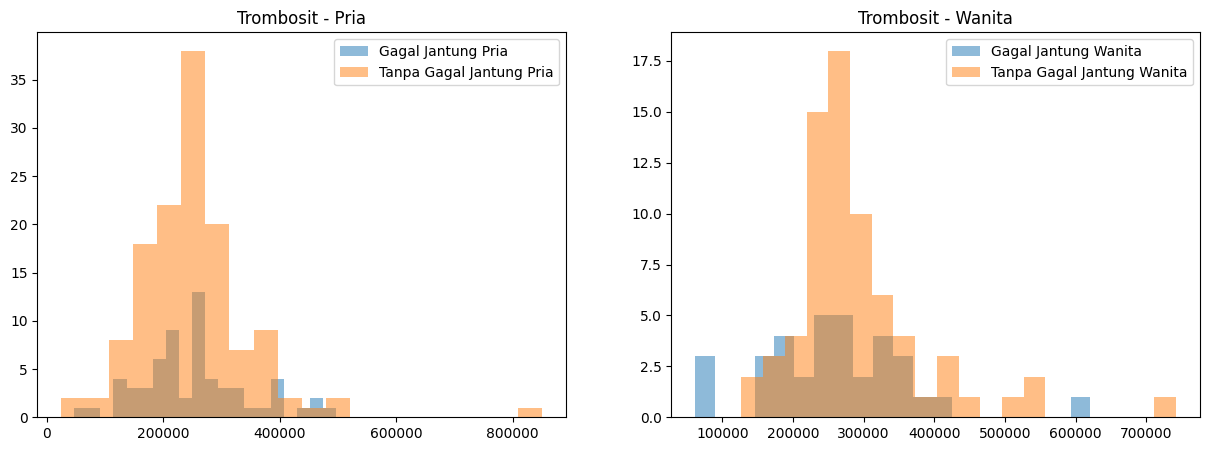

In [112]:
# Membandingkan distribusi usia berdasarkan jenis kelamin

plt.figure(figsize=(15, 5))

# Laki-laki
plt.subplot(121)
plt.hist(df_hf[df_hf['sex'] == 1]['age'], bins=20, alpha=0.5, label='Gagal Jantung Pria')
plt.hist(df_nohf[df_nohf['sex'] == 1]['age'], bins=20, alpha=0.5, label='Tanpa Gagal Jantung Pria')
plt.legend()
plt.title('Usia - Pria')

# Perempuan
plt.subplot(122)
plt.hist(df_hf[df_hf['sex'] == 0]['age'], bins=20, alpha=0.5, label='Gagal Jantung Wanita')
plt.hist(df_nohf[df_nohf['sex'] == 0]['age'], bins=20, alpha=0.5, label='Tanpa Gagal Jantung Wanita')
plt.legend()
plt.title('Usia - Wanita')

plt.show()

# Membandingkan distribusi trombosit berdasarkan jenis kelamin

plt.figure(figsize=(15, 5))

# Laki-laki
plt.subplot(121)
plt.hist(df_hf[df_hf['sex'] == 1]['platelets'], bins=20, alpha=0.5, label='Gagal Jantung Pria')
plt.hist(df_nohf[df_nohf['sex'] == 1]['platelets'], bins=20, alpha=0.5, label='Tanpa Gagal Jantung Pria')
plt.legend()
plt.title('Trombosit - Pria')

# Perempuan
plt.subplot(122)
plt.hist(df_hf[df_hf['sex'] == 0]['platelets'], bins=20, alpha=0.5, label='Gagal Jantung Wanita')
plt.hist(df_nohf[df_nohf['sex'] == 0]['platelets'], bins=20, alpha=0.5, label='Tanpa Gagal Jantung Wanita')
plt.legend()
plt.title('Trombosit - Wanita')

plt.show()

*Usia*
1. Pria : Distribusi usia pasien gagal jantung (HF) pria tampak lebih ke kanan., menunjukkan kemungkinan usia rata-rata pasien HF pria lebih tinggi.
2. Wanita : Distribusi usia pasien HF wanita tampak sedikit lebih ke kanan

*Trombosit*

Distribusi trombosit pasien HF pria dan tanpa HF pria juga pasien HF wanita dan tanpa HF wanita tampak serupa, menunjukkan kemungkinan tidak ada perbedaan signifikan dalam rata-rata trombosit

- Usia lebih tinggi pada pasien HF pria
- Tidak ada perbedaan signifikan dalam rata-rata trombosit antara pasien HF dan tanpa HF pada pria maupun wanita.

### Data Cleaning

In [102]:
# Menghitung jumlah nilai missing ( hilang) pada setiap kolom
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [113]:
# Cek duplikasi pada baris
df.duplicated().sum()  # Menghitung jumlah baris duplikat

0

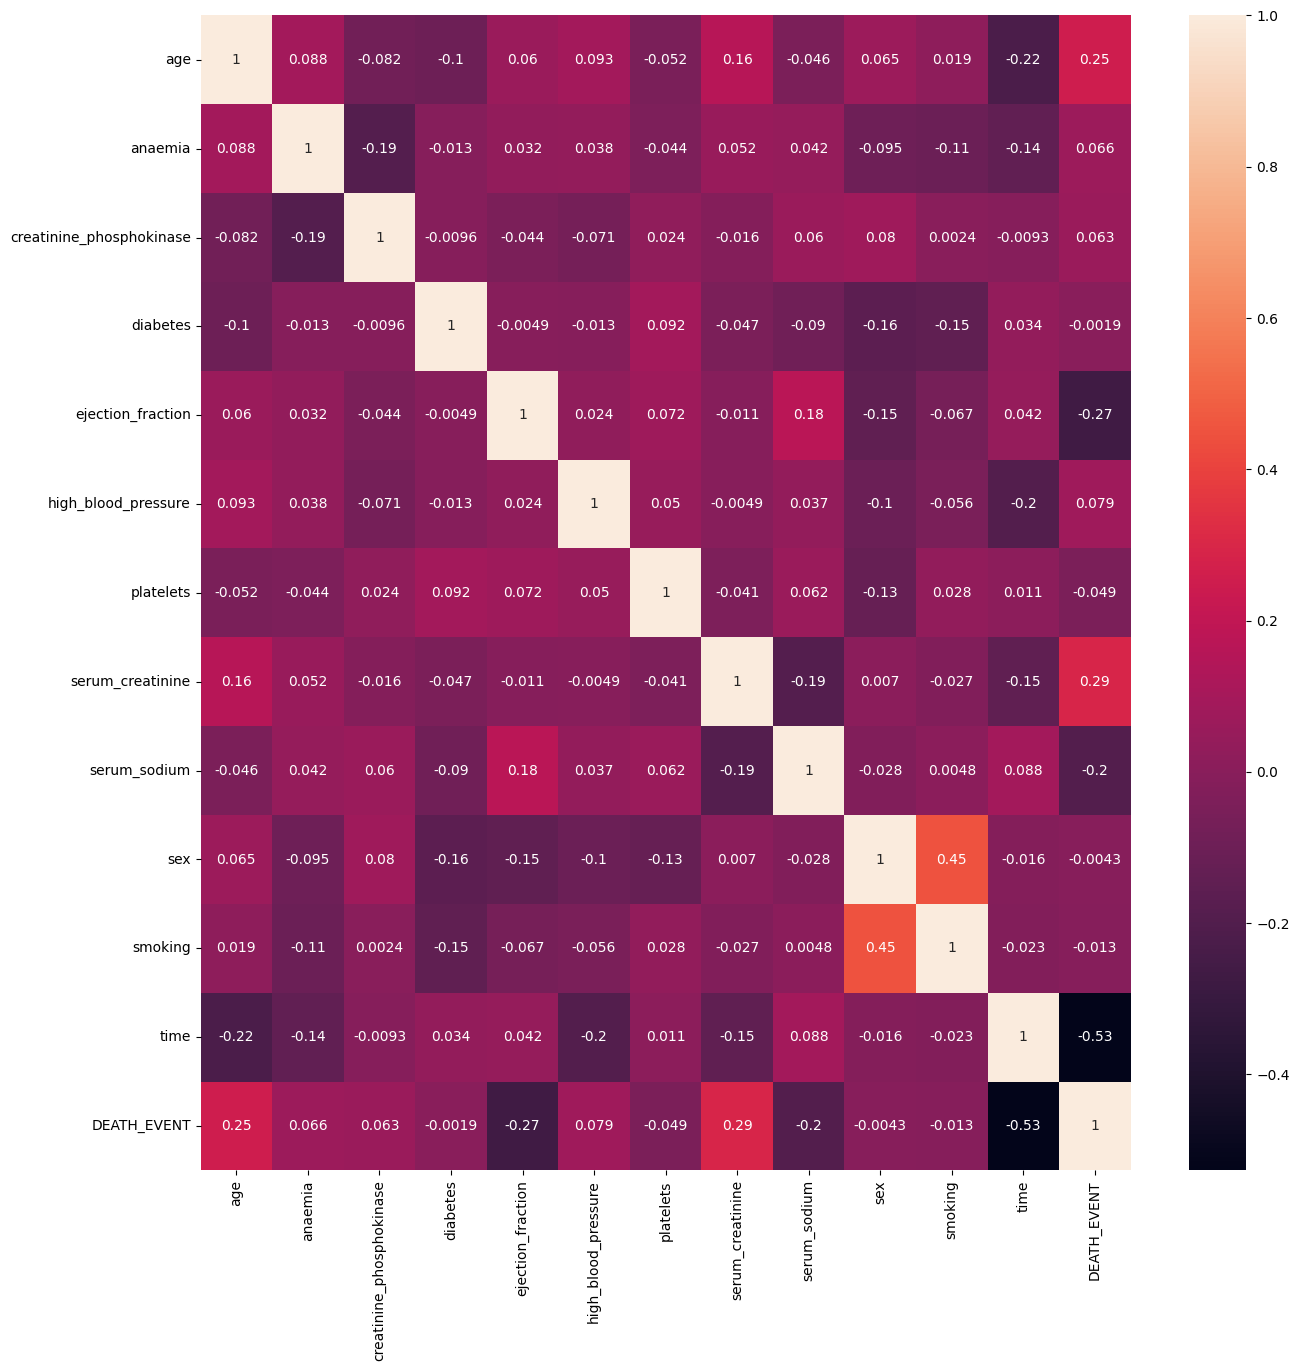

In [114]:
plt.figure(figsize = (15, 15))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

Keterangan warna =
- Warna merah menunjukkan korelasi positif, yang berarti bahwa ketika satu variabel meningkat, variabel lainnya cenderung meningkat.
- Warna biru menunjukkan korelasi negatif, yang berarti bahwa ketika satu variabel meningkat, variabel lainnya - cenderung menurun.
- Semakin merah atau biru, semakin kuat korelasi antara kedua variabel.
- Warna putih menunjukkan tidak ada korelasi antara kedua variabel.

Keterangan Nilai Korelasi =

Nilai 1 menunjukkan korelasi positif yang sempurna.

Nilai -1 menunjukkan korelasi negatif yang sempurna.

Nilai 0 menunjukkan tidak ada korelasi.


In [115]:
# Mengambil baris sebagai input berdasarkan "time" dan "death event"
def label_high(row):
    if row['time'] <= 140 and row["DEATH_EVENT"] == 1:
        return 1
    elif row['time'] > 140 and row['DEATH_EVENT'] == 1:
        return -1
    elif row['time'] <= 140 and row['DEATH_EVENT'] == 0:
        return -1
    elif row['time'] > 140 and row['DEATH_EVENT'] == 0:
        return 0

# Menambahkan kolom "high"
df['high'] =  df.apply(lambda row: label_high(row), axis=1)

# Filter dan penghilangan data
df_drop = df[(df.high == -1)]
df.drop(index=df_drop.index, inplace=True,axis=1)
df.shape

# Menghilangkan kolom "death event"
df = df.drop(['DEATH_EVENT'], axis=1)
df.shape

(194, 13)

*if row['time'] <= 140 and row["DEATH_EVENT"] == 1:*
- Kondisi ini memeriksa apakah nilai di kolom time pada baris tersebut kurang dari atau sama dengan 140 dan nilai di kolom DEATH_EVENT sama dengan 1 (meninggal).
- Jika kondisi terpenuhi, fungsi mengembalikan nilai 1. Menandakan pasien meninggal dalam waktu 140 satuan waktu (bisa jam, menit, dll tergantung definisi time).

*elif row['time'] > 140 and row['DEATH_EVENT'] == 1*
- Kondisi ini memeriksa apakah nilai di kolom time pada baris tersebut lebih besar dari 140 dan nilai di kolom DEATH_EVENT sama dengan 1 (meninggal).
- Jika kondisi terpenuhi, fungsi mengembalikan nilai -1. Ini menandakan pasien meninggal setelah 140 satuan waktu

*elif row['time'] <= 140 and row['DEATH_EVENT'] == 0:*
- Kondisi ini memeriksa apakah nilai di kolom time pada baris tersebut kurang dari atau sama dengan 140 dan nilai di kolom DEATH_EVENT sama dengan 0 (bertahan hidup).
- Jika kondisi terpenuhi, fungsi mengembalikan nilai -1. pasien seharusnya bernilai 0 jika bertahan hidup dalam waktu 140

*elif row['time'] > 140 and row['DEATH_EVENT'] == 0:*
- Kondisi ini memeriksa apakah nilai di kolom time pada baris tersebut lebih besar dari 140 DAN nilai di kolom DEATH_EVENT sama dengan 0 (bertahan hidup).
- Jika kondisi terpenuhi, fungsi mengembalikan nilai 0. Ini menandakan pasien bertahan hidup melebihi 140 satuan waktu.

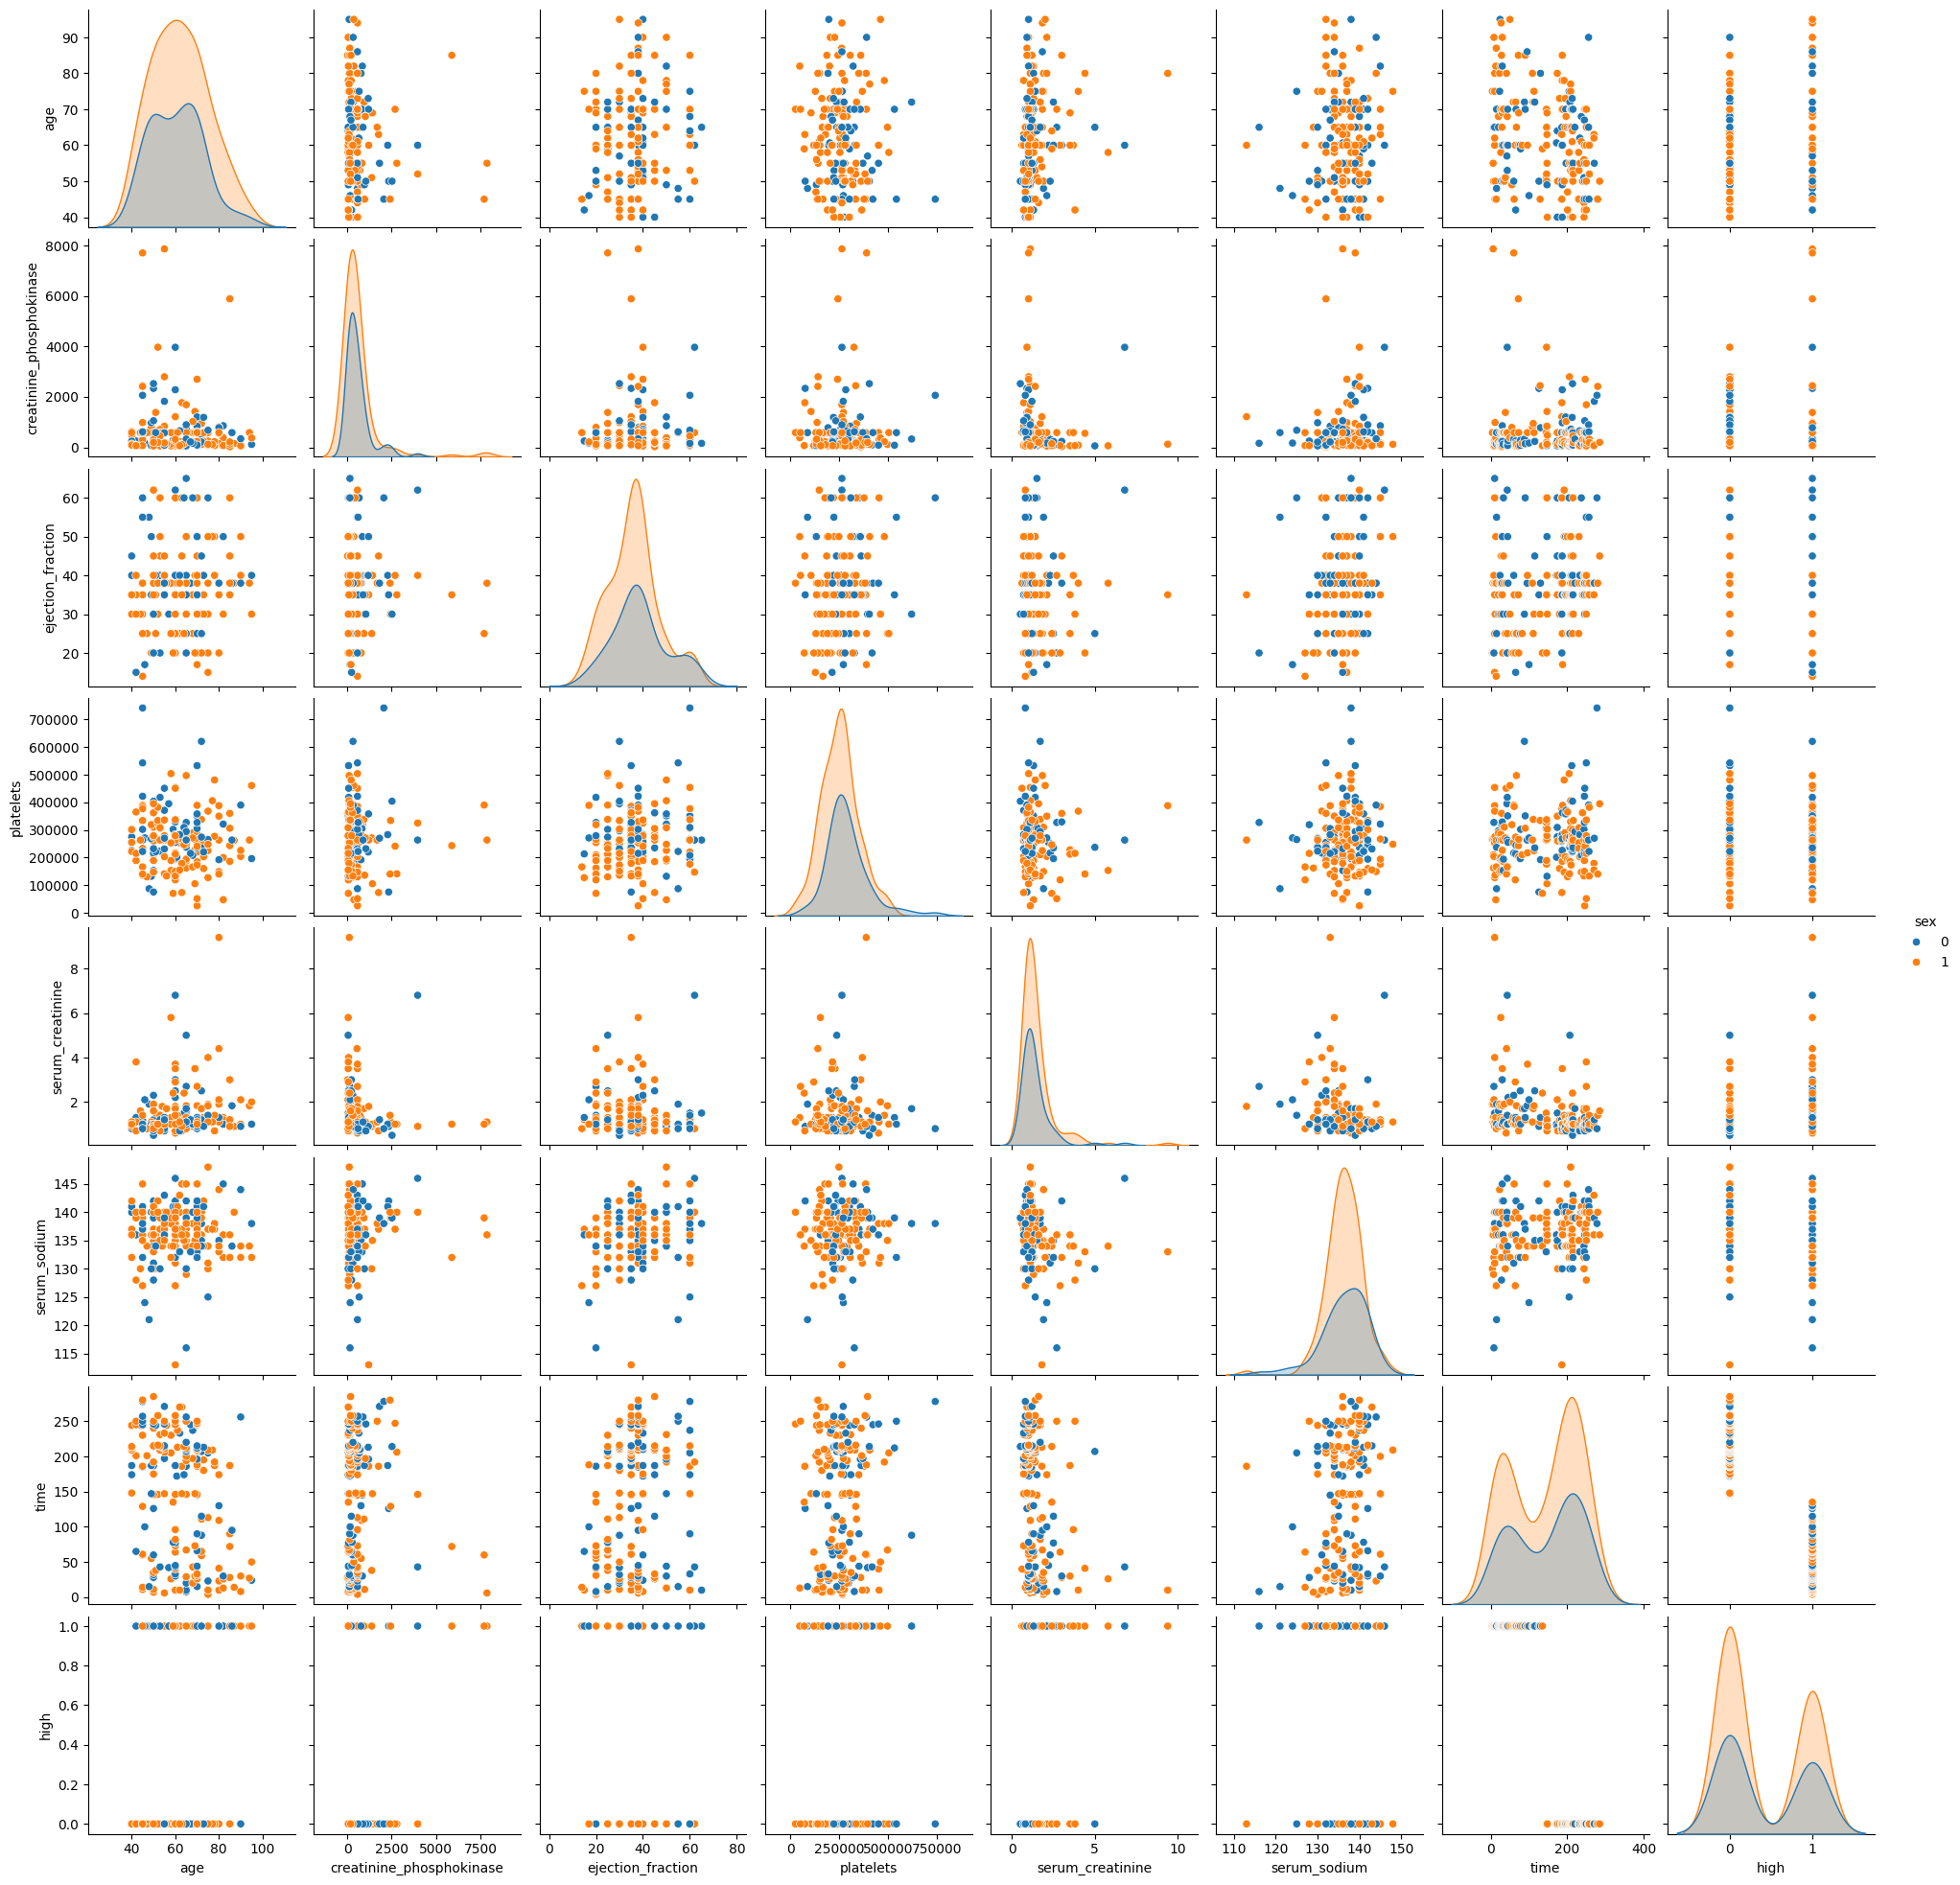

In [ ]:
non_bool = df.drop(['diabetes', 'anaemia', 'high_blood_pressure', 'smoking'], axis=1)

sns.pairplot(non_bool, hue='sex')

non_bool mendefinisikan subset dataset yang akan divisualisasikan yang berisi kolom numerik

Warna pada scatterplot menunjukkan perbedaan hubungan antar variabel berdasarkan jenis kelamin.
- Memahami hubungan antar variabel numerik pada pasien gagal jantung.
- Mengidentifikasi perbedaan hubungan antar variabel berdasarkan jenis kelamin.


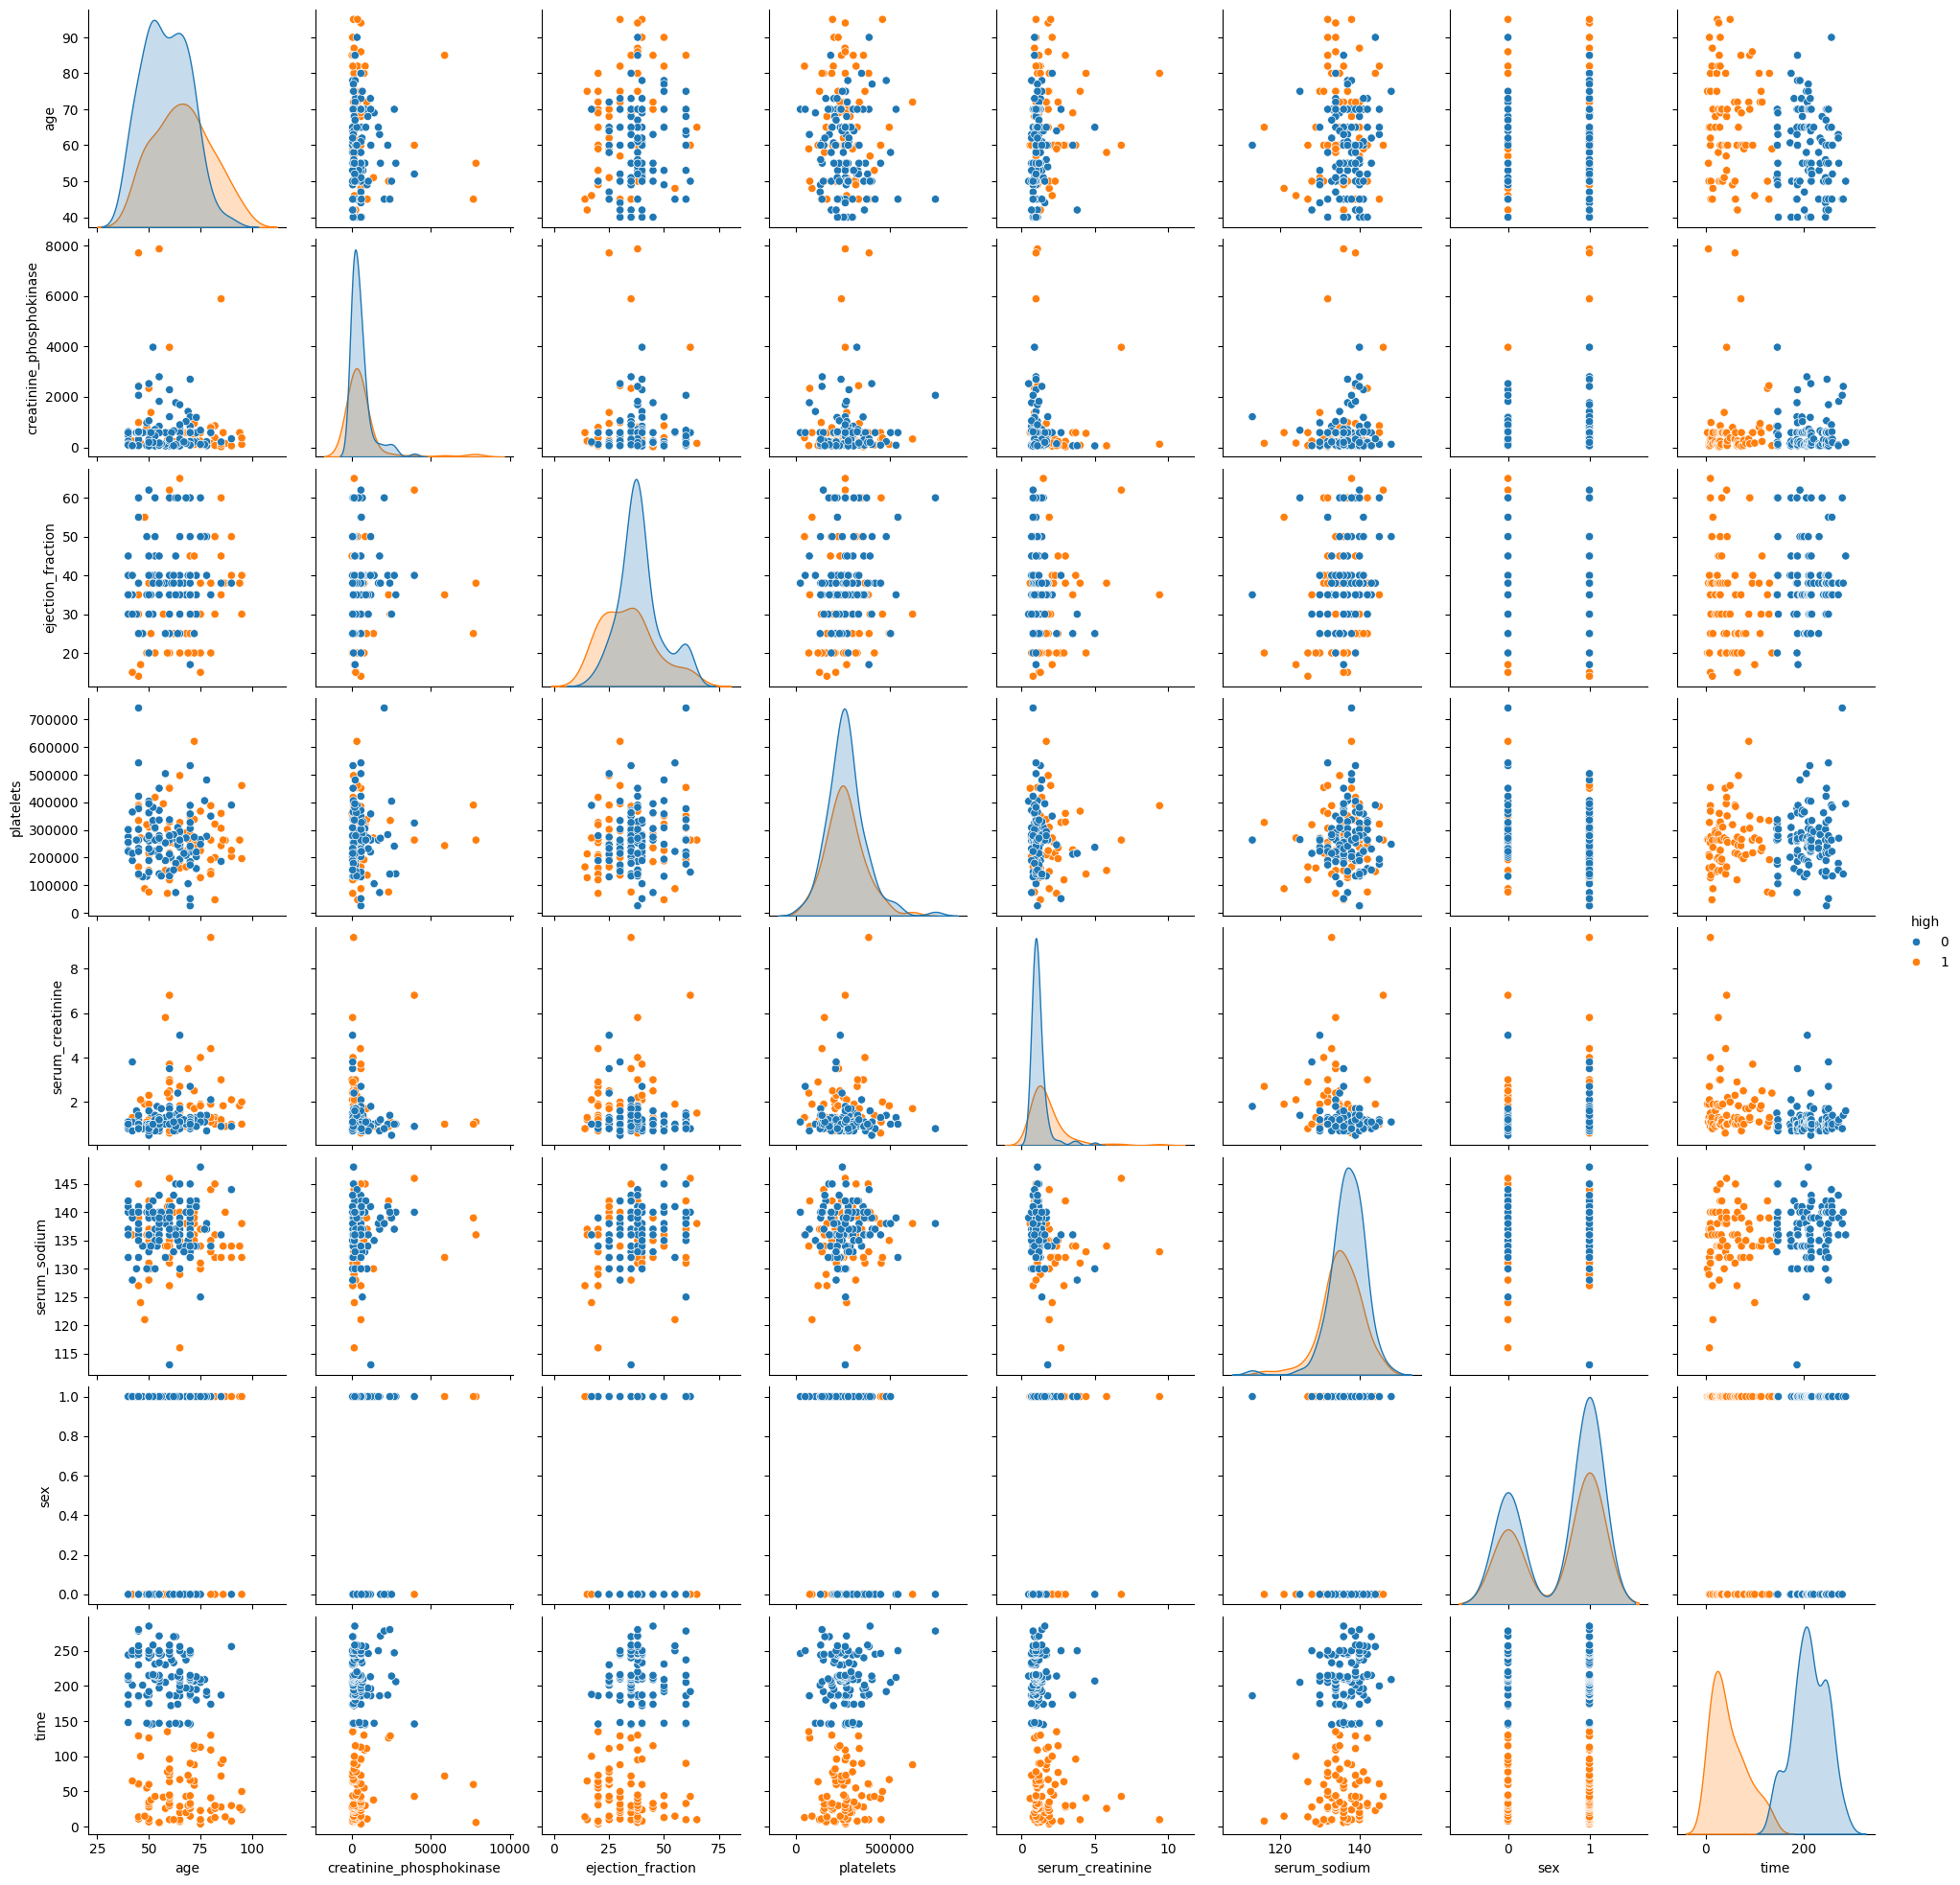

In [117]:
sns.pairplot(non_bool, hue='high', palette=["C0", "C1"])

Scatterplot antara age dan creatinine dapat menunjukkan apakah pasien yang lebih tua memiliki kadar kreatinin yang lebih tinggi.

In [118]:
# Menhapuskan kolom "sex"
non_bool = non_bool.drop(['sex'], axis=1)
non_bool.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,high
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,61.637459,606.005155,36.927835,265292.930309,1.432577,136.340206,143.886598,0.412371
std,12.811766,1047.497979,11.164570,101462.555953,1.038604,4.774471,88.081495,0.493535
min,40.000000,23.000000,14.000000,25100.000000,0.500000,113.000000,4.000000,0.000000
25%,50.000000,123.250000,30.000000,204000.000000,1.000000,134.000000,46.250000,0.000000
50%,60.000000,251.500000,38.000000,263358.030000,1.100000,136.500000,177.500000,0.000000
75%,70.000000,582.000000,40.000000,308750.000000,1.500000,140.000000,214.000000,1.000000
max,95.000000,7861.000000,65.000000,742000.000000,9.400000,148.000000,285.000000,1.000000


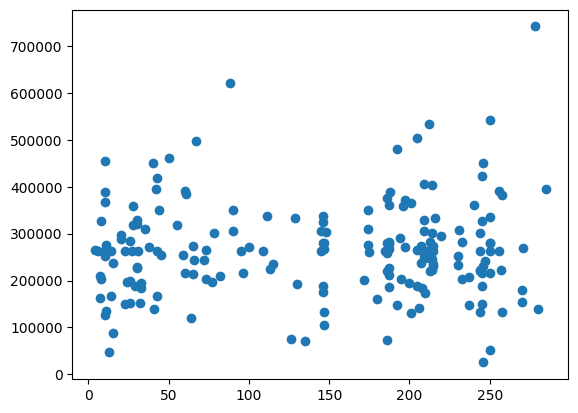

In [119]:
# Menunjukan hubungan antara "time" dan "platelets"
plt.scatter(df['time'], df['platelets'])

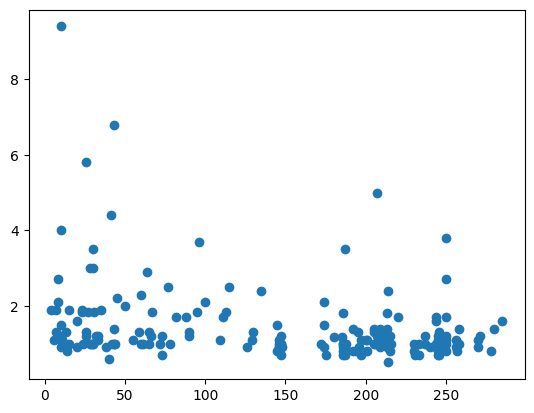

In [120]:
# Menunjukan hubungan antara "time" dan "serum creatinine"
plt.scatter(df['time'], df['serum_creatinine'])

In [121]:
# Menghilangkan kolom "time"
df = df.drop("time", axis=1)
print(df['high'].value_counts())
df.shape

high
0    114
1     80
Name: count, dtype: int64


(194, 12)

## Modeling

Setelah data gagal jantung telah diproses sebelumnya, langkah selanjutnya dalam membuat model machine learning untuk perkiraan gagal jantung adalah pemilihan model. Setelah memilih model, langkah selanjutnya adalah seleksi model, pelatihan model, dan evaluasi model menggunakan Logistic Regression, Decission Tree Classifier, dan Random Forest Classifier

In [122]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,high
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


In [123]:
# Menghitung jumlah data setiap nilai unik dalam kolom
df["high"].value_counts()

high
0    114
1     80
Name: count, dtype: int64

In [175]:
# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Logistic Regression
model = LogisticRegression()

# Latih model pada set pelatihan
model.fit(X_train, y_train)

# Prediksi pada set pengujian
y_pred = model.predict(X_test)

# Evaluasi akurasi model
accuracy = accuracy_score(y_test, y_pred)

# Cetak akurasi
print("Akurasi:", accuracy)

# Buat laporan klasifikasi
classification_report = classification_report(y_test, y_pred)

# Cetak laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report)


Akurasi: 0.7866666666666666
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        44
           1       0.86      0.58      0.69        31

    accuracy                           0.79        75
   macro avg       0.81      0.76      0.76        75
weighted avg       0.80      0.79      0.78        75



In [155]:
# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Decision Tree Classifier
model = DecisionTreeClassifier()

# Latih model pada set pelatihan
model.fit(X_train, y_train)

# Prediksi pada set pengujian
y_pred = model.predict(X_test)  # Ensure prediction

# Evaluasi akurasi model
accuracy = accuracy_score(y_test, y_pred)

# Cetak akurasi
print("Akurasi:", accuracy)

# Buat laporan klasifikasi
classification_report = classification_report(y_test, y_pred)

# Cetak laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report)

Akurasi: 0.7066666666666667
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        44
           1       0.68      0.55      0.61        31

    accuracy                           0.71        75
   macro avg       0.70      0.68      0.69        75
weighted avg       0.70      0.71      0.70        75



In [163]:
# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Buat model random forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model pada set pelatihan
model_rf.fit(X_train, y_train)

# Prediksi pada set pengujian
y_pred_rf = model_rf.predict(X_test)

# Evaluasi akurasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Cetak akurasi
print("Akurasi Random Forest:", accuracy_rf)

from sklearn.metrics import classification_report, confusion_matrix
# Buat laporan klasifikasi
classification_report = classification_report(y_test, y_pred_rf)

# Cetak laporan klasifikasi
print("Laporan Klasifikasi Random Forest:")
print(classification_report)


Akurasi Random Forest: 0.7333333333333333
Laporan Klasifikasi Random Forest:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        44
           1       0.74      0.55      0.63        31

    accuracy                           0.73        75
   macro avg       0.73      0.71      0.71        75
weighted avg       0.73      0.73      0.72        75



Akurasi: 0.5866666666666667
Confusion Matrix:
[[44  0]
 [31  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        44
           1       0.00      0.00      0.00        31

    accuracy                           0.59        75
   macro avg       0.29      0.50      0.37        75
weighted avg       0.34      0.59      0.43        75

Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


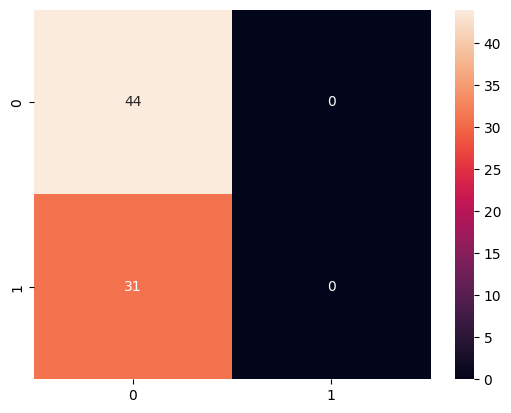

In [183]:
from sklearn.metrics import confusion_matrix, classification_report, recall_score

# Ubah kode di sini
model = SVC()

# Latih model pada set pelatihan
model.fit(X_train, y_train)

# Prediksi pada set pengujian
y_pred = model.predict(X_test)

# Evaluasi akurasi model
accuracy = accuracy_score(y_test, y_pred)

# Cetak akurasi
print("Akurasi:", accuracy)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

Logistic Regression = 0.7866666666666666

Decision Tree = 0.7066666666666667

Random Forest = 0.7333333333333333

SVC = 0.5866666666666667

Setelah memilih model machine learning selanjutnya membuat prediksi pada data baru yang belum pernah dilihat sebelumnya. Pada correlation matrix digunakan untuk penggambaran visualisasi untuk menggambarkan korelasi matriks dari tiap kolom yang ada pada dataset.

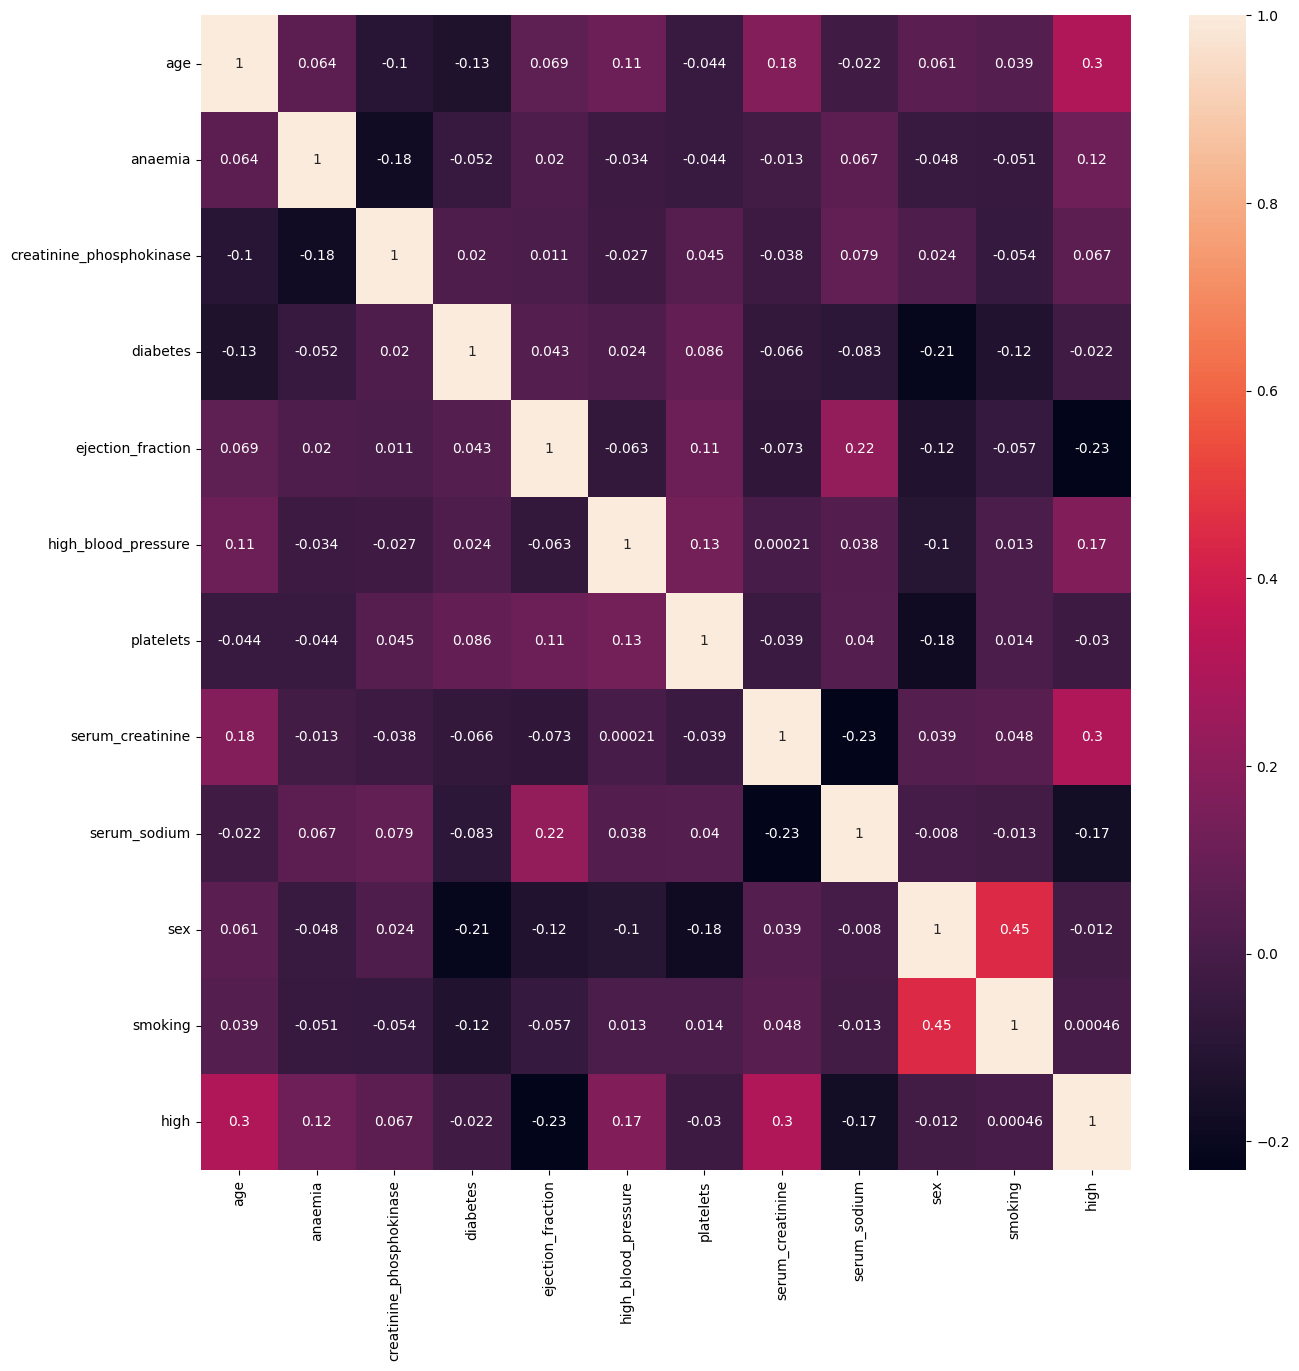

In [173]:
plt.figure(figsize = (15, 15))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [184]:
# Buat model klasifikasi
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Latih model pada set pelatihan
for name, model in models.items():
    model.fit(X_train, y_train)

# Prediksi pada set pengujian
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)

# Evaluasi kinerja model
for name, prediction in predictions.items():
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)

    print(f"--- {name} ---")
    print(f"Akurasi: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")

# Cetak tabel ringkasan
print("\n--- Ringkasan Kinerja Model ---")
pd.DataFrame({
    "Model": list(models.keys()),
    "Accuracy": [accuracy_score(y_test, pred) for pred in predictions.values()],
    "Precision": [precision_score(y_test, pred) for pred in predictions.values()],
    "Recall": [recall_score(y_test, pred) for pred in predictions.values()],
    "F1-score": [f1_score(y_test, pred) for pred in predictions.values()]
}).to_string()

--- Logistic Regression ---
Akurasi: 0.7866666666666666
Precision: 0.8571428571428571
Recall: 0.5806451612903226
F1-score: 0.6923076923076923
--- Decision Tree ---
Akurasi: 0.6666666666666666
Precision: 0.6363636363636364
Recall: 0.45161290322580644
F1-score: 0.5283018867924528
--- Random Forest ---
Akurasi: 0.7333333333333333
Precision: 0.7391304347826086
Recall: 0.5483870967741935
F1-score: 0.6296296296296297
--- SVM ---
Akurasi: 0.5866666666666667
Precision: 0.0
Recall: 0.0
F1-score: 0.0

--- Ringkasan Kinerja Model ---


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'                 Model  Accuracy  Precision    Recall  F1-score\n0  Logistic Regression  0.786667   0.857143  0.580645  0.692308\n1        Decision Tree  0.666667   0.636364  0.451613  0.528302\n2        Random Forest  0.733333   0.739130  0.548387  0.629630\n3                  SVM  0.586667   0.000000  0.000000  0.000000'

Akurasi Logistic Regression: 0.7866666666666666
Akurasi Decision Tree: 0.68
Akurasi Random Forest: 0.68
Akurasi SVC: 0.5866666666666667
Akurasi Voting: 0.68


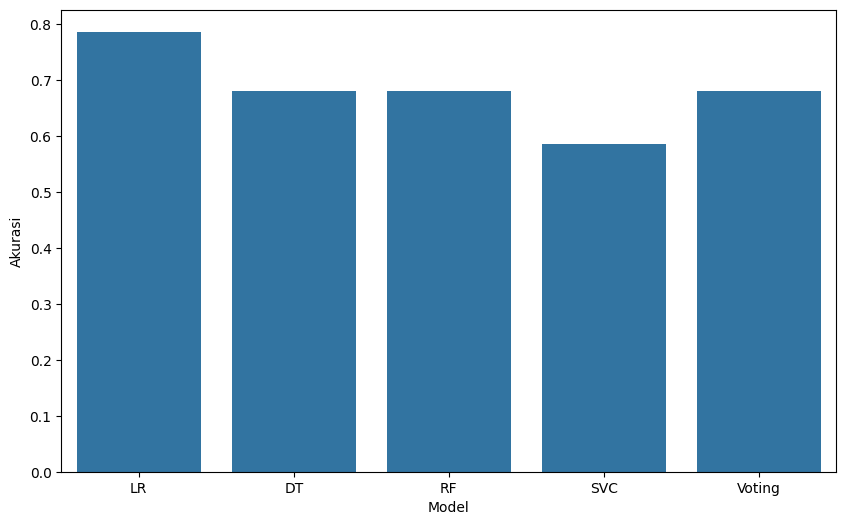

In [195]:
# Inisialisasi model
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()

# Latih model pada set pelatihan
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
svc.fit(X_train, y_train)

# Voting dengan hard voting (mayoritas suara)
voting_clf = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('rf', rf), ('svc', svc)], voting='hard')

# Latih VotingClassifier pada set pelatihan
voting_clf.fit(X_train, y_train)

# Prediksi pada set pengujian
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
svc_pred = svc.predict(X_test)
voting_pred = voting_clf.predict(X_test)

# Hitung akurasi
lr_accuracy = accuracy_score(y_test, lr_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
svc_accuracy = accuracy_score(y_test, svc_pred)
voting_accuracy = accuracy_score(y_test, voting_pred)

# Cetak akurasi
print("Akurasi Logistic Regression:", lr_accuracy)
print("Akurasi Decision Tree:", dt_accuracy)
print("Akurasi Random Forest:", rf_accuracy)
print("Akurasi SVC:", svc_accuracy)
print("Akurasi Voting:", voting_accuracy)

# Visualisasi performa (opsional)
plt.figure(figsize=(10, 6))
sns.barplot(x=['LR', 'DT', 'RF', 'SVC', 'Voting'], y=[lr_accuracy, dt_accuracy, rf_accuracy, svc_accuracy, voting_accuracy])
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.show()


In [179]:
# Define RFC
RFC = RandomForestClassifier()

# Define parameter grid
param_grid = {
    "max_depth": [3, 5, 10],
    "max_features": ["auto", "sqrt", "log2"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 5, 10],
    "n_estimators": [100, 300],
    "criterion": ["gini", "entropy"],
}

# Tune hyperparameters
gsRFC = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1)
gsRFC.fit(X_train, y_train)

# Get best estimator and score
best_estimator = gsRFC.best_estimator_
best_score = gsRFC.best_score_

# Print best estimator
print("Best Estimator:", best_estimator)
print("Best Score:", best_score)

# Predict on test data
y_pred = best_estimator.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Best Estimator: RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)
Best Score: 0.8885858585858586


## Kesimpulan

Data tersebut kemungkinan besar berisi informasi kesehatan pasien dan mungkin terkait dengan penelitian medis yang menyelidiki faktor-faktor yang berhubungan dengan kematian.

Untuk cluster pengujian untuk digunakan dalam algoritma machine learning dan telah dianalisis dengan banyak metode seperti Logistic Regression, Decision Tree, Random Forest dan SVC.

Didapat dari hasil tuning, hyperparameter terbaik adalah Random forest classifier sebesar 0.8885
